# Cleaning of Dataset

### Read Data

In [1]:
london_weekday <- read.csv('data/london_weekdays.csv')
london_weekend <- read.csv('data/london_weekends.csv')

In [2]:
head(london_weekday)

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.0981,Entire home/apt,False,False,2,False,0,0,10,98,1,5.301018,1.5889904,209.6326,14.57179,467.5975,8.372724,-0.16032,51.46531
1,297.9844,Private room,False,True,2,True,1,0,10,99,1,2.198946,0.3792620,553.8917,38.50163,961.4721,17.215961,-0.09683,51.50343
2,336.7906,Private room,False,True,2,False,1,0,10,96,1,2.322958,0.4531776,428.2878,29.77076,959.0428,17.172462,-0.10554,51.52407
3,226.7222,Private room,False,True,2,True,1,0,10,99,1,5.707825,1.7239771,195.6947,13.60296,452.2325,8.097600,-0.16575,51.46292
4,256.3560,Private room,False,True,3,False,0,0,9,98,1,3.257945,0.8254172,329.4771,22.90232,735.3273,13.166649,-0.12055,51.53728
5,239.8928,Private room,False,True,2,False,0,0,10,100,1,5.085730,1.8062181,226.7250,15.75990,486.7371,8.715433,-0.17241,51.47222


In [3]:
head(london_weekend)

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.1223,Private room,False,True,2,False,0,0,6,69,1,5.734117,0.4370940,222.8822,15.49341,470.0885,8.413765,-0.04975,51.52570
1,195.9124,Private room,False,True,2,False,1,0,10,96,1,4.788905,1.4640505,235.3858,16.36259,530.1335,9.488466,-0.08475,51.54210
2,193.3253,Private room,False,True,3,False,1,0,10,95,1,4.596677,0.4503062,268.9138,18.69325,548.9876,9.825922,-0.14585,51.54802
3,180.3899,Private room,False,True,2,False,1,0,9,87,1,2.054769,0.1326705,472.3813,32.83707,1021.2711,18.278973,-0.10611,51.52108
4,405.7010,Entire home/apt,False,False,3,False,0,1,7,65,0,4.491277,0.3541075,318.4915,22.13958,692.7754,12.399473,-0.18797,51.49399
5,354.1946,Entire home/apt,False,False,2,False,0,1,9,93,0,4.467894,0.3507494,321.8646,22.37406,703.0686,12.583702,-0.18805,51.49473


### Visualise Data
Note that data seems skewed, hence apply log transformation

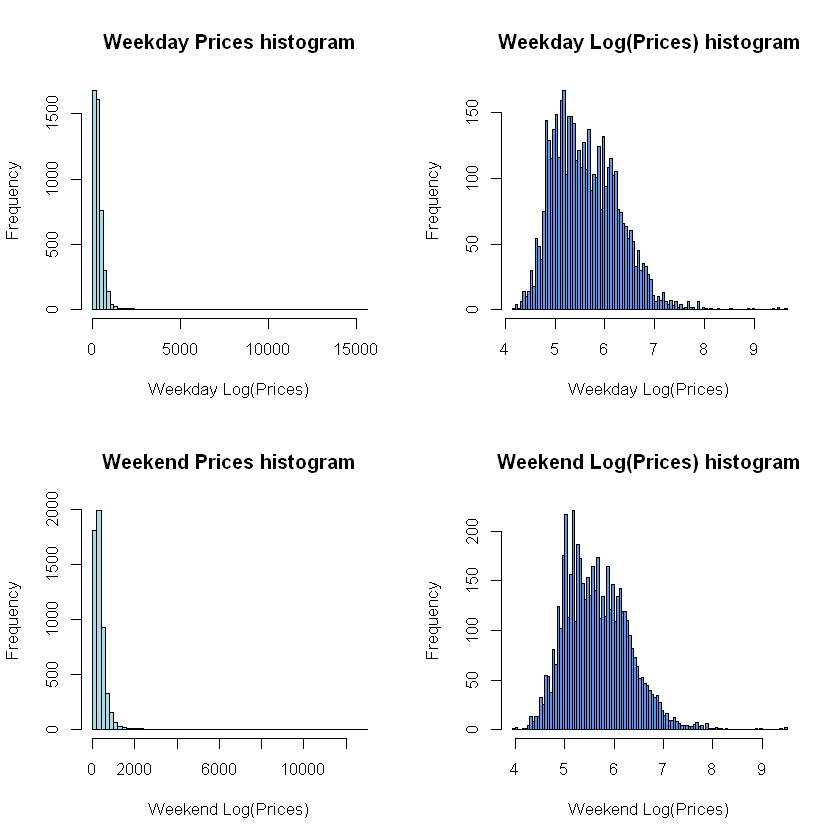

In [4]:
par(mfrow=c(2,2))

#Weekday: Without log transform
price_weekday <- london_weekday$realSum
hist(price_weekday, col = "lightblue"
, xlab = "Weekday Log(Prices)"
, main = 'Weekday Prices histogram',breaks=80)

#Weekday: With log transform
l_price_weekday <- log(london_weekday$realSum)
hist(l_price_weekday, col = "cornflowerblue"
, xlab = "Weekday Log(Prices)"
, main = 'Weekday Log(Prices) histogram',breaks=80)

#Weekend: Without log transform
price_weekend <- london_weekend$realSum
hist(price_weekend, col = "lightblue"
, xlab = "Weekend Log(Prices)"
, main = 'Weekend Prices histogram',breaks=80)

#Weekend: With log transform
l_price_weekend <- log(london_weekend$realSum)
hist(l_price_weekend, col = "cornflowerblue"
, xlab = "Weekend Log(Prices)"
, main = 'Weekend Log(Prices) histogram',breaks=80)

### Remove Outliers
Note that even after log transformation is applied, some outliers exist. The outliers are mainly due to the entire appartment listings being of a much higher price than the private and shared appartments. Hence, we focus on the prices of the private and share appartments only, and remove outliers that that are outside the 1.5*IQR range

In [5]:
#Shows the room_type with the highest prices
outlierprices <- london_weekday[order(london_weekday$realSum,decreasing=TRUE),]
head(outlierprices,n=20)

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1887,1886,15499.894,Entire home/apt,False,False,3,True,0,1,10,95,3,0.2691010,0.2271933,1100.3917,76.48945,2358.3585,42.228377,-0.13038,51.50995
3168,3167,12886.239,Entire home/apt,False,False,6,False,0,0,10,100,2,2.9383263,0.6197170,386.7318,26.88216,781.5264,13.993882,-0.14658,51.53190
3484,3483,12886.239,Private room,False,True,2,False,0,0,7,80,1,5.6234608,0.4855537,233.7668,16.24939,444.0518,7.951117,-0.04987,51.49397
1379,1378,12076.954,Private room,False,True,2,False,0,0,8,89,3,4.3035316,0.7090280,318.8115,22.16094,666.0130,11.925519,-0.18071,51.48849
4123,4122,7759.355,Entire home/apt,False,False,6,False,0,0,10,100,3,1.7091286,0.2964712,626.7365,43.56515,1012.5754,18.131008,-0.13984,51.49503
3535,3534,7223.829,Entire home/apt,False,False,4,True,0,0,9,98,2,0.4763776,0.2497076,1098.1663,76.33476,1374.4535,24.610738,-0.12335,51.50492
1892,1891,5166.631,Private room,False,True,3,True,0,1,10,99,2,0.3674286,0.1291938,973.0211,67.63577,2434.7544,43.596309,-0.13217,51.50989
1802,1801,3874.974,Entire home/apt,False,False,2,False,1,0,10,100,2,7.6789488,0.5172337,175.5451,12.20234,377.1586,6.753339,-0.01795,51.49898
155,154,3413.768,Entire home/apt,False,False,4,True,0,0,10,100,2,4.8419929,0.3337938,268.6595,18.67482,639.1557,11.444616,-0.19700,51.51200
4465,4464,3000.071,Entire home/apt,False,False,6,False,0,1,10,100,3,4.0718988,0.5306749,364.1388,25.31169,738.4377,13.222343,-0.18486,51.50069


#### Filter data structure to include private and share rooms only

In [6]:
london_weekday_private_shared <- subset(london_weekday, (london_weekday$room_type=='Private room' | london_weekday$room_type=='Shared room'))
london_weekend_private_shared <- subset(london_weekend, (london_weekend$room_type=='Private room' | london_weekend$room_type=='Shared room'))

#### Function to find lower and upper quartiles to remove outliers

In [7]:
outlierData <- function(data){
    quartiles <- quantile(data, probs=c(.25, .75), na.rm = FALSE)    
    IQR <- IQR(data)
    Lower <- quartiles[1] - 1.5*IQR
    Upper <- quartiles[2] + 1.5*IQR 
    output <- list(Lower, Upper)
    return (output)}

In [8]:
weekday_outlier <- outlierData(london_weekday_private_shared$realSum)
weekend_outlier <- outlierData(london_weekend_private_shared$realSum)

In [9]:
#Remove outliers from dataset
london_weekday_cleaned <- subset(london_weekday_private_shared, 
                                      realSum > weekday_outlier[1] &
                                       realSum < weekday_outlier[2])
london_weekend_cleaned <- subset(london_weekend_private_shared, 
                                      realSum > weekend_outlier[1] &
                                       realSum < weekend_outlier[2])

### Plot before and after removal of outliers

#### Histogram

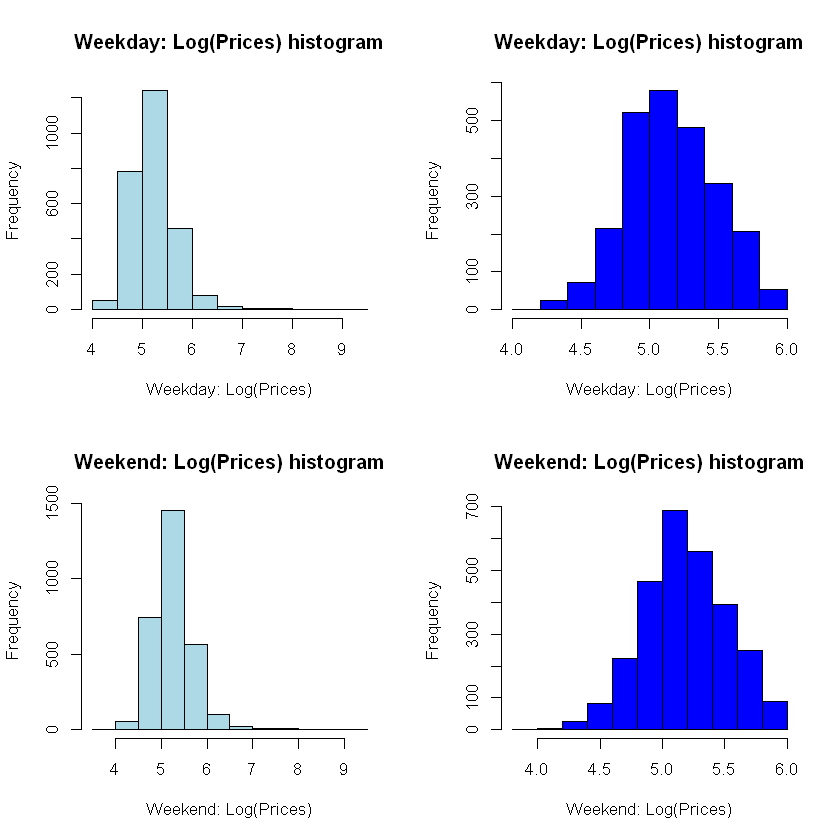

In [10]:
par(mfrow=c(2,2))
#Weekday: With log transform 
price_weekday <- log(london_weekday_private_shared$realSum)
hist(price_weekday, col = "lightblue"
, xlab = "Weekday: Log(Prices)"
, main = 'Weekday: Log(Prices) histogram',breaks=10)

#Weekday: With log transform + remove outliers
price_weekday_cleaned <- log(london_weekday_cleaned$realSum)
hist(price_weekday_cleaned, col = "blue"
, xlab = "Weekday: Log(Prices)"
, main = 'Weekday: Log(Prices) histogram',breaks=10)

#Weekday: With log transform 
price_weekday <- log(london_weekend_private_shared$realSum)
hist(price_weekday, col = "lightblue"
, xlab = "Weekend: Log(Prices)"
, main = 'Weekend: Log(Prices) histogram',breaks=10)

#Weekday: With log transform + remove outliers
price_weekday_cleaned <- log(london_weekend_cleaned$realSum)
hist(price_weekday_cleaned, col = "blue"
, xlab = "Weekend: Log(Prices)"
, main = 'Weekend: Log(Prices) histogram',breaks=10)


#### Boxplot

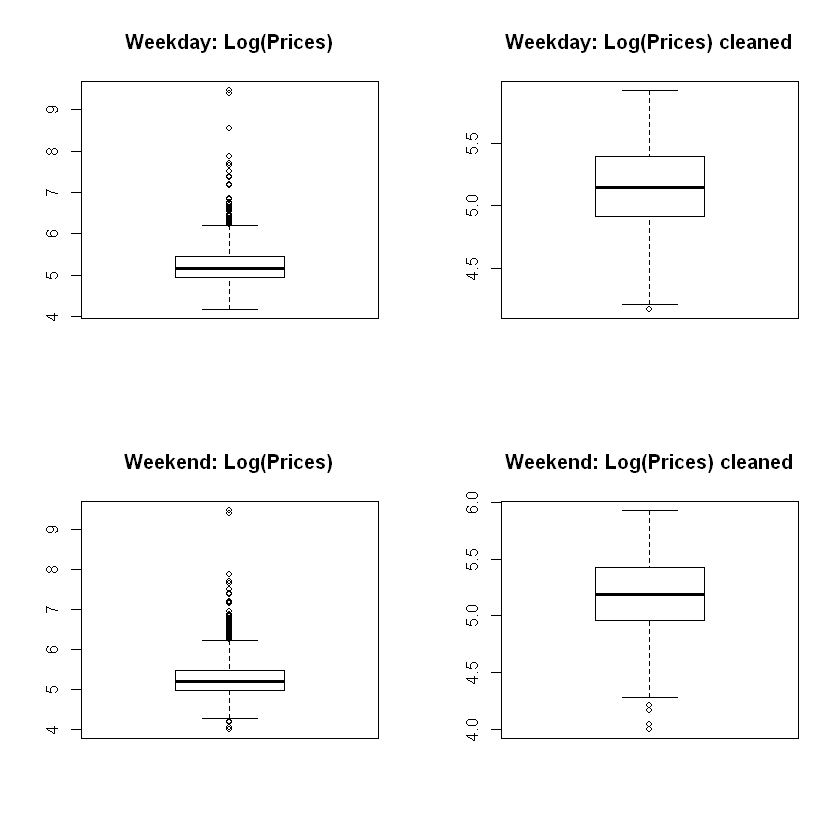

In [11]:
par(mfrow=c(2,2))
#Weekday prices
boxplot(log(london_weekday_private_shared$realSum), main="Weekday: Log(Prices)")
boxplot(log(london_weekday_cleaned$realSum), main="Weekday: Log(Prices) cleaned")
#Weekend prices
boxplot(log(london_weekend_private_shared$realSum), main="Weekend: Log(Prices)")
boxplot(log(london_weekend_cleaned$realSum), main="Weekend: Log(Prices) cleaned")

### Write cleaned data to csv file

In [12]:
write.csv(london_weekday_cleaned, 'london_weekday_cleaned.csv', row.names=FALSE)
write.csv(london_weekend_cleaned, 'london_weekend_cleaned.csv', row.names=FALSE)